In [47]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification, make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report

from nn_utils.nn import Model

In [49]:
def plot_data(X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.6)
    plt.show()

In [50]:
def evaluate_predictions(y_true, y_pred):
    y_pred = np.argmax(y_pred, axis=1)
    print("Accuracy: ", accuracy_score(y_true, y_pred))
    #print("F1 Score: ", f1_score(y_true, y_pred, average='macro'))
    print(classification_report(y_true, y_pred))
    print("Confusion Matrix: \n", confusion_matrix(y_true, y_pred))


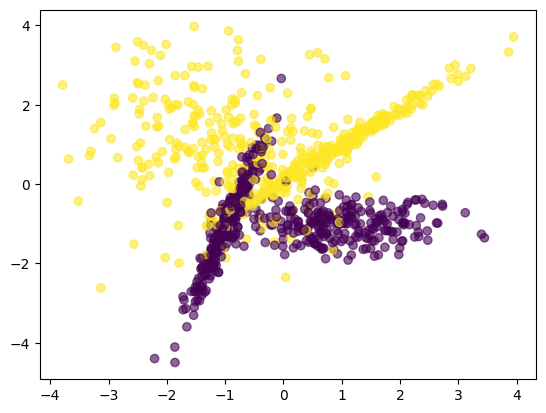

In [51]:
n_classes = 2
X, y = make_classification(n_samples = 1000, n_classes = n_classes, n_features = 2, 
                           n_informative=2, n_redundant=0, random_state = 42, n_clusters_per_class=2,
                            class_sep=0.95)
plot_data(X, y)
plt.show()
X_train, X_test, y_train, y_test = train_test_split(X, y.reshape(-1,1), test_size=0.2, random_state=42)

In [52]:
hyperparameters = {
    "inputDim": X_train.shape[1],
    "hiddenDim": 64,
    "outputDim": n_classes,
    "numLayers": 8,
    "learningRate": 0.1,
    "activationFunction": "relu",
    "dropoutRate": 0.1,
    "epochs": 200,
    "batchSize": 64,
}

In [53]:
model = Model(**hyperparameters)
print(f"Number of parameters {model.num_params()}")

Number of parameters 25282


In [54]:
model.train(X_train, y_train, X_test, y_test, epochs_print=10, dropout=False)

Epoch: 10 | Train Loss: 0.693267 | Val Loss: 0.693226 | Val Accuracy: 0.4450 | Val F1 Score: 0.4450
Epoch: 20 | Train Loss: 0.692938 | Val Loss: 0.692873 | Val Accuracy: 0.4950 | Val F1 Score: 0.4950
Epoch: 30 | Train Loss: 0.692626 | Val Loss: 0.692474 | Val Accuracy: 0.4950 | Val F1 Score: 0.4950
Epoch: 40 | Train Loss: 0.692210 | Val Loss: 0.691932 | Val Accuracy: 0.4950 | Val F1 Score: 0.4950
Epoch: 50 | Train Loss: 0.691554 | Val Loss: 0.691088 | Val Accuracy: 0.4950 | Val F1 Score: 0.4950
Epoch: 60 | Train Loss: 0.690422 | Val Loss: 0.689597 | Val Accuracy: 0.5050 | Val F1 Score: 0.5050
Epoch: 70 | Train Loss: 0.687996 | Val Loss: 0.686391 | Val Accuracy: 0.7700 | Val F1 Score: 0.7700
Epoch: 80 | Train Loss: 0.681116 | Val Loss: 0.677439 | Val Accuracy: 0.8150 | Val F1 Score: 0.8150
Epoch: 90 | Train Loss: 0.651687 | Val Loss: 0.639787 | Val Accuracy: 0.8650 | Val F1 Score: 0.8650
Epoch: 100 | Train Loss: 0.494471 | Val Loss: 0.451926 | Val Accuracy: 0.8700 | Val F1 Score: 0.8700

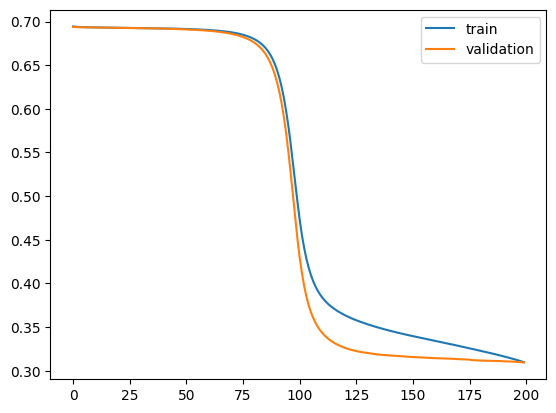

In [55]:
# plot the training loss and validation loss
plt.plot(model.trainLoss, label="train")
plt.plot(model.valLoss, label="validation")
plt.legend()
plt.show()


In [56]:
y_pred = model.predict(X_test)
evaluate_predictions(y_test, y_pred)

Accuracy:  0.905
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       101
           1       0.91      0.90      0.90        99

    accuracy                           0.91       200
   macro avg       0.91      0.90      0.90       200
weighted avg       0.91      0.91      0.90       200

Confusion Matrix: 
 [[92  9]
 [10 89]]


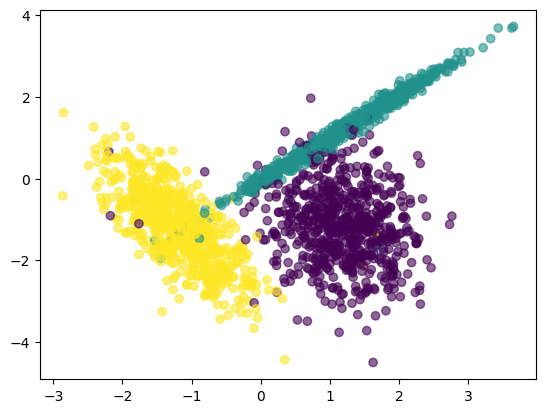

In [57]:
n2_classes = 3
X2, y2 = make_classification(n_samples = 2000, n_classes = n2_classes, n_features = 2, 
                           n_informative=2, n_redundant=0, random_state = 42, n_clusters_per_class=1,
                            class_sep=1.2)
plot_data(X2, y2)
plt.show()
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2.reshape(-1,1), test_size=0.2, random_state=42)

In [74]:
hyperparameters = {
    "inputDim": X2_train.shape[1],
    "hiddenDim": 64,
    "outputDim": n2_classes,
    "numLayers": 8,
    "learningRate": 0.1,
    "activationFunction": "relu",
    "dropoutRate": 0.0,
    "epochs": 500,
    "batchSize": 256,
}

In [75]:
model2 = Model(**hyperparameters)
model2.num_params()

25347

In [76]:
model2.train(X2_train, y2_train, X2_test, y2_test, epochs_print=50, dropout=False)

Epoch: 50 | Train Loss: 1.097420 | Val Loss: 1.099036 | Val Accuracy: 0.3325 | Val F1 Score: 0.3325
Epoch: 100 | Train Loss: 1.096411 | Val Loss: 1.098055 | Val Accuracy: 0.3325 | Val F1 Score: 0.3325
Epoch: 150 | Train Loss: 1.094512 | Val Loss: 1.095917 | Val Accuracy: 0.3325 | Val F1 Score: 0.3325
Epoch: 200 | Train Loss: 1.090132 | Val Loss: 1.091111 | Val Accuracy: 0.3325 | Val F1 Score: 0.3325
Epoch: 250 | Train Loss: 1.071398 | Val Loss: 1.070580 | Val Accuracy: 0.3325 | Val F1 Score: 0.3325
Epoch: 300 | Train Loss: 0.792200 | Val Loss: 0.772642 | Val Accuracy: 0.6725 | Val F1 Score: 0.6725
Epoch: 350 | Train Loss: 0.572933 | Val Loss: 0.553776 | Val Accuracy: 0.7600 | Val F1 Score: 0.7600
Epoch: 400 | Train Loss: 0.317340 | Val Loss: 0.307517 | Val Accuracy: 0.9025 | Val F1 Score: 0.9025
Epoch: 450 | Train Loss: 0.212511 | Val Loss: 0.323289 | Val Accuracy: 0.9225 | Val F1 Score: 0.9225
Epoch: 500 | Train Loss: 0.182472 | Val Loss: 0.503731 | Val Accuracy: 0.9275 | Val F1 Score

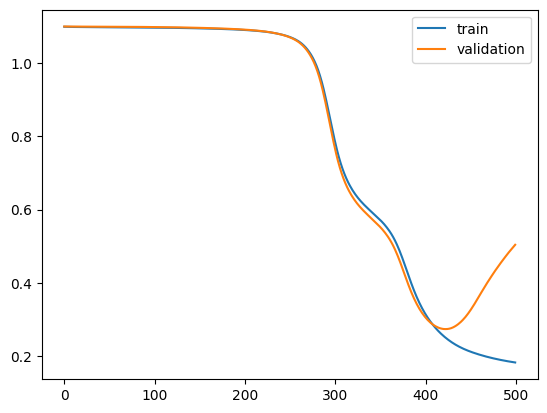

In [77]:
# plot the training loss and validation loss
plt.plot(model2.trainLoss, label="train")
plt.plot(model2.valLoss, label="validation")
plt.legend()
plt.show()

In [78]:
y_pred2 = model2.predict(X2_test)
evaluate_predictions(y2_test, y_pred2)

Accuracy:  0.9675
              precision    recall  f1-score   support

           0       0.99      0.92      0.96       129
           1       0.93      0.99      0.96       138
           2       0.99      0.99      0.99       133

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400

Confusion Matrix: 
 [[119  10   0]
 [  0 136   2]
 [  1   0 132]]
